## Tutorial 2： SLOT cluster

To perform clustering, make sure that the AnnData object is in the correct format: (genes) x (cells). The following code snippet demonstrates how to perform clustering on the S6 protein data from the adata_list and then visualize the results using UMAP.



In [1]:
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import SLOT
from SLOT import SLOT_model  

### Prepare data
selected top 1000 spatial ploarity proteins for slot clustering

In [2]:
adata = sc.read_h5ad('data/S4_Protein.h5ad')
slot_adata = SLOT_model(adata)
slot_adata.construct_prob_matrix(step=5)
slot_adata.slot_metric(dist="uni", scale=True)

Added spatial probability matrix to adata.varm
Added SLOT score to adata.var


In [3]:
cluster_adata = adata.T  # Transpose to (genes) x (cells)
slot_scores = cluster_adata.obs['slot_score']  # Get slot_score from obs
top_1000_samples = cluster_adata[slot_scores.argsort()[::-1][:1000]]  # Select top 1000 samples based on slot_score

### Perform clustering

In [4]:
SLOT.cluster.slot_neighbors(top_1000_samples,n_neighbors=10)  # Calculate neighbors
SLOT.cluster.leiden(top_1000_samples, resolution=0.2)  # Perform Leiden clustering

The AnnData object is expected to be in the format: (genes) x (cells).
Neighbor matrices added to adata.obsp
Constructing neighbor graph
Clustering...
Clustering completed and stored in adata.obs['slot_pattern']


## Cluster plot
Using scanpy to visualize the clusters

         Falling back to preprocessing with `sc.pp.pca` and default params.


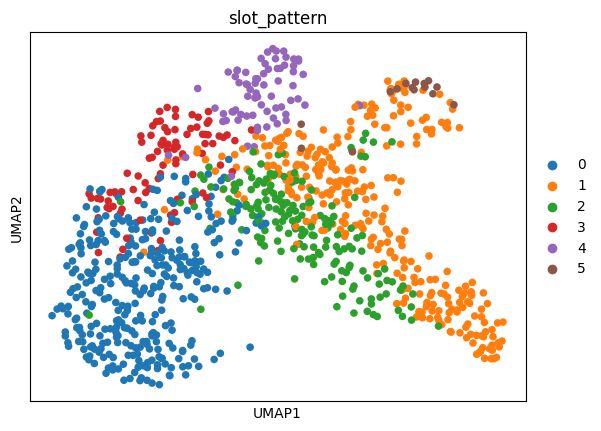

In [5]:
sc.pp.neighbors(top_1000_samples)
sc.tl.umap(top_1000_samples, neighbors_key='slot_neighbors') 
sc.pl.umap(top_1000_samples, color='slot_pattern')